# Build a regression model using Scikit-learn: prepare and visualize data

Working on the US-pumpkins.csv dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [26]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [27]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        415 non-null    object 
 1   Type             9 non-null      object 
 2   Package          415 non-null    object 
 3   Variety          415 non-null    object 
 4   Sub Variety      248 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             415 non-null    object 
 7   Low Price        415 non-null    float64
 8   High Price       415 non-null    float64
 9   Mostly Low       391 non-null    float64
 10  Mostly High      391 non-null    float64
 11  Origin           415 non-null    object 
 12  Origin District  19 non-null     object 
 13  Item Size        301 non-null    object 
 14  Color            270 non-null    object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     11 non-null     object 
 17  Quality       

In [28]:
pumpkins.shape

(415, 26)

So many missing values!

In [29]:
# checking missing data
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

Let's drop several of its columns, using drop(), keeping only the columns we need, just to keep things simple

In [30]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


## Determining average price of pumpkin

We take the average of the Low Price and High Price columns to populate the new Price column, and convert the Date column to only show the month. Fortunately, according to the check above, there is no missing data for dates or prices.

In [31]:
# calculating average price
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
# getting the months
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


In [32]:
# making a new DataFrame of data
new_pumpkins = pd.DataFrame({'Month':month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'price': price })

new_pumpkins.head()

,Month,Package,Low Price,High Price,price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


In [33]:
# standardizing the price

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [34]:
new_pumpkins['Package'].value_counts()

1/2 bushel cartons      234
1 1/9 bushel cartons    117
bushel cartons           37
1 1/9 bushel crates      17
bushel baskets           10
Name: Package, dtype: int64

If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

Pumpkins seem very hard to weigh consistently

Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

We need to filter this where we first read the csv.
```py
pumpkins = pumpkins['Package'].str.contains('bushel',case=True,regex=True)
```


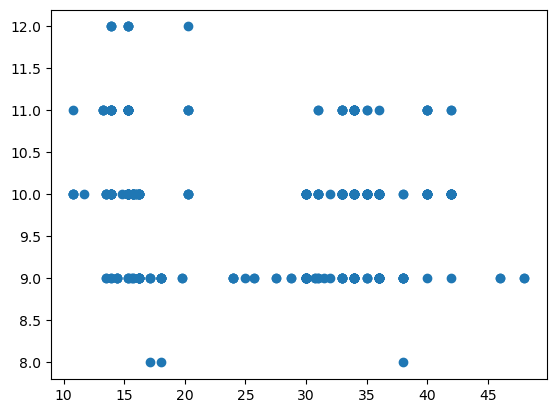

In [35]:
# Visualization
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

Grouping the data to make the plot useful, where the y axis shows the months and the data demonstrates the distribution of data.

Text(0, 0.5, 'Pumpkins Price')

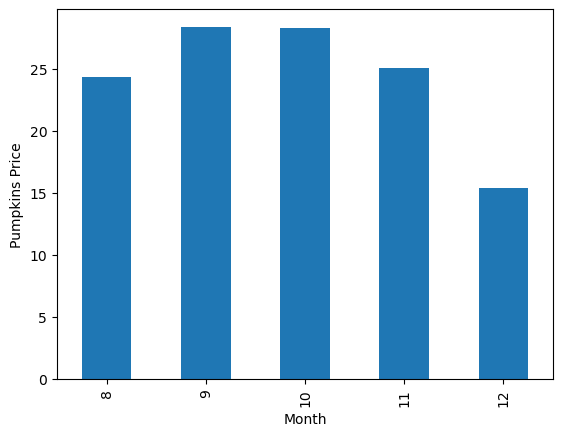

In [38]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkins Price')